In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Import data

In [2]:
data_filepath: Path = Path('data.csv')
assert(data_filepath.exists())

data = pd.read_csv(str(data_filepath), header=0, index_col='Seq')
dtype_spec = {column: np.int64 for column in data.columns[1:]} # Build a type specification
print(dtype_spec)
data.astype(dtype_spec) # Apply spec to data
data

{'Sensor 2': <class 'numpy.int64'>, 'Sensor 3': <class 'numpy.int64'>, 'Sensor 4': <class 'numpy.int64'>, 'Sensor 5': <class 'numpy.int64'>, 'Sensor 6': <class 'numpy.int64'>, 'Sensor 7': <class 'numpy.int64'>, 'Sensor 8': <class 'numpy.int64'>, 'Sensor 9': <class 'numpy.int64'>, 'Sensor 10': <class 'numpy.int64'>, 'Sensor 11': <class 'numpy.int64'>, 'Sensor 12': <class 'numpy.int64'>, 'Sensor 13': <class 'numpy.int64'>, 'Sensor 14': <class 'numpy.int64'>, 'Sensor 15': <class 'numpy.int64'>, 'Sensor 16': <class 'numpy.int64'>, 'Sensor 17': <class 'numpy.int64'>}


,Sensor 1,Sensor 2,Sensor 3,Sensor 4,Sensor 5,Sensor 6,Sensor 7,Sensor 8,Sensor 9,Sensor 10,Sensor 11,Sensor 12,Sensor 13,Sensor 14,Sensor 15,Sensor 16,Sensor 17
Seq,,,,,,,,,,,,,,,,,
V1,375,57,245,1472,105,54,193,147,1102,720,253,685,488,198,360,1374,156
V2,475,73,227,1582,103,64,235,160,1137,874,265,803,570,203,365,1256,175
V3,135,47,267,1494,66,41,209,93,674,1033,143,586,355,187,334,1506,139
V4,458,53,242,1462,103,62,184,122,957,566,171,750,418,220,337,1572,147
V5,509,63,271,1613,118,55,207,139,1058,628,193,830,465,247,376,1734,167
V6,469,63,268,1490,101,63,223,152,1098,706,247,699,467,209,363,1597,164
V7,336,62,219,1323,98,59,172,130,990,646,226,615,437,176,322,1235,138
V8,492,58,286,1493,118,59,156,101,878,320,99,777,313,204,348,1684,170


# Normalize data

In [3]:
data[:] = StandardScaler().fit_transform(data[:]) # Normalize each column (sensor). MinMaxScaler is also another option.
data

/tmp/ipykernel_1014100/3752098928.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.26696722  0.59075879 -2.32550965  0.44494537  0.88238564  0.53929523
 -0.60148037  0.73657221]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data[:] = StandardScaler().fit_transform(data[:]) # Normalize each column (sensor). MinMaxScaler is also another option.
/tmp/ipykernel_1014100/3752098928.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.34503278  1.86317701 -1.7251639  -0.89708523  0.48304589  0.48304589
  0.34503278 -0.20701967]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data[:] = StandardScaler().fit_transform(data[:]) # Normalize each column (sensor). MinMaxScaler is also another option.
/tmp/ipykernel_1014100/3752098928.py:1: FutureWarning: Setting a

,Sensor 1,Sensor 2,Sensor 3,Sensor 4,Sensor 5,Sensor 6,Sensor 7,Sensor 8,Sensor 9,Sensor 10,Sensor 11,Sensor 12,Sensor 13,Sensor 14,Sensor 15,Sensor 16,Sensor 17
Seq,,,,,,,,,,,,,,,,,
V1,-0.266967,-0.345033,-0.370330,-0.235849,0.231160,-0.449376,-0.177615,0.735516,0.805320,0.169374,0.969296,-0.404095,0.656063,-0.373718,0.543550,-0.684907,-0.074848
V2,0.590759,1.863177,-1.190753,1.120667,0.099069,0.988627,1.527486,1.315013,1.049886,0.950907,1.187218,1.035399,1.756773,-0.124573,0.833443,-1.354215,1.347266
V3,-2.325510,-1.725164,0.632409,0.035454,-2.344627,-2.318779,0.471947,-1.671627,-2.185370,1.757813,-1.028317,-1.611807,-1.129234,-0.921837,-0.963895,0.063811,-1.347266
V4,0.444945,-0.897085,-0.507067,-0.359168,0.099069,0.701026,-0.542993,-0.378902,-0.207881,-0.612158,-0.519833,0.388846,-0.283567,0.722521,-0.789959,0.438170,-0.748481
V5,0.882386,0.483046,0.814726,1.502957,1.089756,-0.305576,0.390752,0.378902,0.497866,-0.297515,-0.120311,1.364775,0.347328,2.067904,1.471208,1.357051,0.748481
V6,0.539295,0.483046,0.677988,-0.013873,-0.033023,0.844827,1.040314,0.958399,0.777370,0.098326,0.860335,-0.233308,0.374174,0.174402,0.717485,0.579973,0.523937
V7,-0.601480,0.345033,-1.555385,-2.073310,-0.231160,0.269625,-1.030165,-0.022288,0.022710,-0.206167,0.478973,-1.258033,-0.028524,-1.469956,-1.659638,-1.473329,-1.422114
V8,0.736572,-0.207020,1.498411,0.023122,1.089756,0.269625,-1.679727,-1.315013,-0.759901,-1.860580,-1.827362,0.718222,-1.693013,-0.074744,-0.152194,1.073446,0.973026


In [4]:
data.mean() # Check that every sensor mean is close to zero

Sensor 1     0.000000e+00
Sensor 2     0.000000e+00
Sensor 3    -2.775558e-17
Sensor 4     0.000000e+00
Sensor 5     2.775558e-17
Sensor 6     2.775558e-17
Sensor 7     0.000000e+00
Sensor 8     5.551115e-17
Sensor 9     2.775558e-17
Sensor 10    0.000000e+00
Sensor 11   -1.387779e-17
Sensor 12    2.775558e-17
Sensor 13    0.000000e+00
Sensor 14   -1.387779e-17
Sensor 15   -2.775558e-17
Sensor 16   -2.775558e-17
Sensor 17    0.000000e+00
dtype: float64

In [5]:
data.std() # Check that every sensor standard deviation is close to one

Sensor 1     1.069045
Sensor 2     1.069045
Sensor 3     1.069045
Sensor 4     1.069045
Sensor 5     1.069045
Sensor 6     1.069045
Sensor 7     1.069045
Sensor 8     1.069045
Sensor 9     1.069045
Sensor 10    1.069045
Sensor 11    1.069045
Sensor 12    1.069045
Sensor 13    1.069045
Sensor 14    1.069045
Sensor 15    1.069045
Sensor 16    1.069045
Sensor 17    1.069045
dtype: float64

# Apply PCA

In [6]:
number_of_components: int = 2
pca = PCA(n_components=number_of_components)
proj_data = pca.fit(data).transform(data)
proj_data

array([[-0.43489476, -1.39189492],
       [-3.74525133, -2.59277406],
       [ 5.57619913, -0.34280074],
       [ 0.54395772,  0.91713667],
       [-2.88111013,  2.24052019],
       [-1.79604146, -0.39681826],
       [ 2.15566856, -2.58655539],
       [ 0.58147227,  4.1531865 ]])

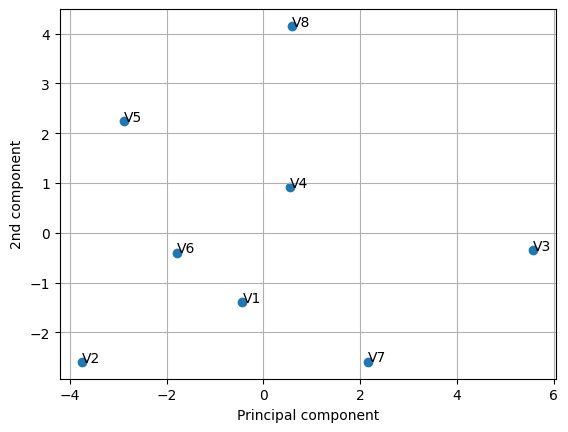

In [7]:
z = pd.DataFrame(proj_data)
fix, ax = plt.subplots()
if number_of_components == 1:
    ax.plot(proj_data)
    plt.grid(axis='y')
    plt.ylabel('Principal component')
    for i in range(len(proj_data)):
        ax.text(i, proj_data[i], f"V{i+1}") # Because PCA is a linear transform the order of the features is the same
elif number_of_components == 2:
    ax.scatter(z[0], z[1])
    plt.grid(True)
    plt.xlabel('Principal component')
    plt.ylabel('2nd component')
    for i in range(len(proj_data)):
        ax.text(z[0][i], z[1][i], f"V{i+1}") # Because PCA is a linear transform the order of the features is the same

It is not hard to see (especially in the n_components=1 version) that the sensor V3 is an significally different than the rest.